### Visualizing ephys data and saving out nwb files
Using the NeuroConv environment bc I changed a method in neo

In [1]:
from decode_lab_code.utils import converters
from decode_lab_code.utils import signal_utils
import matplotlib.pyplot as plt
import numpy as np

Cite NWB
Cite CatalystNeuro: NeuroConv toolbox if converting Neuralynx data


### Instantiate the read_nlx object in the converters file
First we need to define our directory for data ("folder_path")
Next, we can instantiate the read_nlx object for the purposes of working with and loading our data


In [2]:
#folder_path = '/Users/js0403/local data/2021-03-31_08-59-02 16eB R1 10min rec after sec drive cells on 2 and 3 - Control'
folder_path = '/Users/js0403/local data/2020-06-26_16-56-10 9&10eb male ACTH ELS'
data_object = converters.read_nlx(folder_path)

##### Now we can read our ephys data
If clusters are detected, the code will report to user

In [3]:
data_object.read_ephys()

Cite Neo https://github.com/NeuralEnsemble/python-neo/blob/master/CITATION.txt
Working with CSC
Multiple blocks detected in CSC1.ncs. LFP and LFP times have been collapsed into a single array.
Multiple blocks detected in CSC2.ncs. LFP and LFP times have been collapsed into a single array.
Multiple blocks detected in CSC3.ncs. LFP and LFP times have been collapsed into a single array.
Multiple blocks detected in CSC4.ncs. LFP and LFP times have been collapsed into a single array.
Multiple blocks detected in CSC5.ncs. LFP and LFP times have been collapsed into a single array.
Multiple blocks detected in CSC6.ncs. LFP and LFP times have been collapsed into a single array.
Multiple blocks detected in CSC7.ncs. LFP and LFP times have been collapsed into a single array.
Multiple blocks detected in CSC8.ncs. LFP and LFP times have been collapsed into a single array.
Multiple blocks detected in CSC9.ncs. LFP and LFP times have been collapsed into a single array.
Multiple blocks detected in CSC

##### Read the history attribute to see your variables
history reports on available attributes (which can typically be seen by adding a period next to your object), followed by a description as such

folder_path (attribute name): directory of the dataset (definition)

In [4]:
data_object.history

['folder_path: directory of data - added',
 'session_id: session identification variables - added',
 'dir_contents: the contents in the current directory - added',
 'LOGGER: csc_data had multiple blocks. This is likely due to multiple start/stops when recording. LFP and times were concatenated into a single array.',
 'csc_data: CSC data as grouped by ext .ncs',
 'csc_data_names: names of data in csc_data as organized by .ncs files',
 'csc_data_fs: sampling rate for CSC data, defined by .ncs extension',
 'tt_data: Tetrode data as grouped by ext .ntt',
 'tt_data_names: names of data in tt_data as organized by .ntt files',
 'tt_data_fs: hard coded to 32kHz after not detected neo extraction of sampling rate']

### Using the .history attribute, lets access some data
.tt_data is described in .history above

We can also access the dictionary keys to see what options are available

In [5]:
print("here are the csc names:",data_object.csc_data_names)
print("here is how you access the first element:", data_object.csc_data_names[0])

here are the csc names: ['CSC1.ncs', 'CSC2.ncs', 'CSC3.ncs', 'CSC4.ncs', 'CSC5.ncs', 'CSC6.ncs', 'CSC7.ncs', 'CSC8.ncs', 'CSC9.ncs', 'CSC10.ncs', 'CSC11.ncs', 'CSC12.ncs', 'CSC13.ncs', 'CSC14.ncs', 'CSC15.ncs', 'CSC16.ncs']
here is how you access the first element: CSC1.ncs


#### Here, we can use ._names to access information from ._data attributes

Here is LFP from CSC1.ncs [[-22.797327]
 [-25.513475]
 [-17.334515]
 ...
 [ 88.32057 ]
 [ 81.63702 ]
 [ 78.12739 ]]


Text(0.5, 1.0, 'Example signal obtained from the read_nlx class')

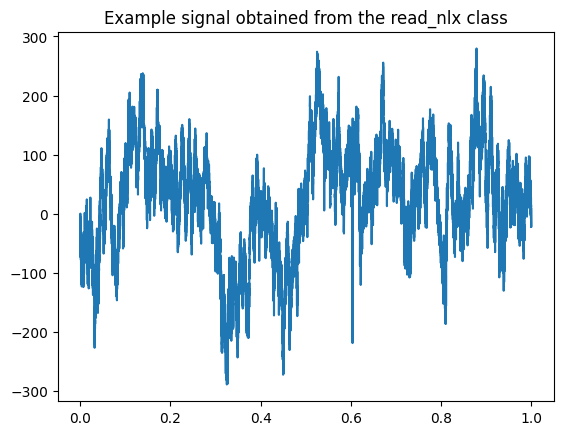

In [6]:
csc1_signal = data_object.csc_data[data_object.csc_data_names[0]]
fs = data_object.csc_data_fs
print("Here is LFP from",data_object.csc_data_names[0],csc1_signal)

time_x = np.linspace(0,1,fs)
plt.plot(time_x[0:fs],csc1_signal[0:fs])
plt.title("Example signal obtained from the read_nlx class")

#### The process_signal class can perform operations on LFP signals
Here is an example of rereferencing

In [7]:
sig = signal_utils.process_signal(data_object.csc_data, fs = fs)
sig.rereference()

### The signal_utils file contains helper functions for plotting
This should probably be its own class or file

/Users/js0403/decode_lab_code/src/decode_lab_code/utils/signal_utils.py:192: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


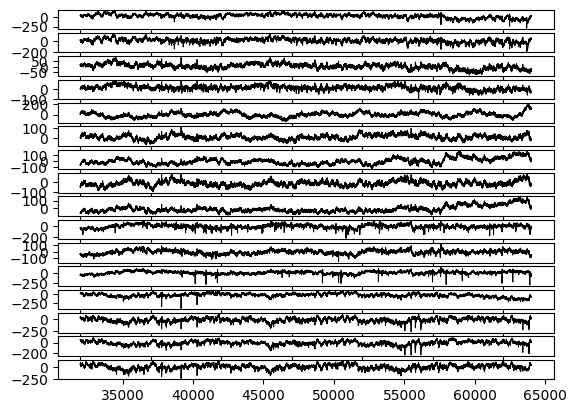

In [8]:
signal_utils.multi_plotter(data = sig.signal_rereferenced, fs=fs, time_range = [1, 2])

In [ ]:
data = 
fig, axes = plt.subplots(nrows=len(data),ncols=1)
key_names = list(data.keys())
for i in range(len(data)):
    if i == len(data)-1:
        x_data = np.linspace(time_range[0]*fs,time_range[1]*fs,len(data[key_names[i]][int(time_range[0]*fs):int(time_range[1]*fs)]))
        axes[i].plot(x_data, data[key_names[i]][int(time_range[0]*fs):int(time_range[1]*fs)],'k',linewidth=0.75)
    else:
        axes[i].plot(data[key_names[i]][int(time_range[0]*fs):int(time_range[1]*fs)],'k',linewidth=0.75)
        #axes[i].xlabel("Time (sec)")
fig.show()


### Using the signal_utils objects

In [ ]:
# TODO: implement signal_utils

# run a filter
sig.butterworth_filter(lowcut = 4, highcut = 12, fs = 32000)

# rereference and plot new results
sig.rereference(rereference_mode = 'CAR')
sig.butterworth_filter(data = sig.signal_rereferenced,lowcut = 4,highcut = 12,fs = 32000)

plt.subplot(3,1,1)
plt.plot(sig.data['TT1a.ncs'][0:32000],'k',linewidth=1)
plt.plot(sig.signal_filtered['TT1a.ncs'][0:32000],'r',linewidth=2)
plt.subplot(3,1,2)
plt.plot(sig.signal_rereferenced['TT1a.ncs'][0:32000],'k',linewidth=1)
plt.plot(sig.signal_filtered['TT1a.ncs'][0:32000],'r',linewidth=2)
plt.subplot(3,1,3)
plt.plot(sig.data['TT1a.ncs'][0:32000],'k',linewidth=1)
plt.plot(sig.signal_rereferenced['TT1a.ncs'][0:32000],'r',linewidth=1)
    

### Between signal correlation

In [ ]:
#%
# testing correlation after signal rereferencing
import pandas as pd
import matplotlib.pyplot as plt
import os

data_pd = pd.DataFrame.from_dict(sig.data)
data_pd_ref = pd.DataFrame.from_dict(sig.signal_rereferenced)

# pairwise correlation
data_cor = pd.DataFrame.corr(self=data_pd, method = 'pearson', min_periods=1, numeric_only = False)
data_cor_reref = pd.DataFrame.corr(self=data_pd_ref, method = 'pearson', min_periods=1, numeric_only = False)

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2)
pos1 = ax1.imshow(data_cor)
ax1.set_xticks(range(len(data_cor)), data_cor.columns, rotation='vertical')
ax1.set_yticks(range(len(data_cor)), data_cor.index)
#ax1.yaxis('off')
fig.colorbar(pos1, ax=ax1, shrink=0.5)

pos2 = ax2.imshow(data_cor_reref)
ax2.set_xticks(range(len(data_cor)), data_cor.columns, rotation='vertical')
ax2.set_yticks(range(len(data_cor)), data_cor.index, color='w')
fig.colorbar(pos2, ax=ax2, shrink=0.5)
fig.savefig(folder_path, format='eps')

In [ ]:
data_cor_reref